## Projet 2 : A/B Testing

### Informations sur le Projet

- **Auteur** : Fono Colince  
  
- **Lien vers les datasets** :  
  - [Dataset : A/B testing ](https://www.kaggle.com/datasets/zhangluyuan/ab-testing)


- Contexte
L’A/B  testing  est  une  méthode  utilisée  pour  comparer  deux  versionsd'un  produit  ou  d'un  service  afin  de  déterminer  laquelle  est  la  plusperformante. Ce projet est très populaire dans le marketing, les produitsdigitaux  et  l’e-commerce  pour  optimiser  des  campagnes  ou  desfonctionnalités.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Description du Dataset : A/B Testing

Ce dataset contient des données d'un test A/B mené pour comparer deux pages web : une ancienne page (**old_page**) et une nouvelle page (**new_page**). L'objectif est de déterminer si la nouvelle page est plus efficace pour convertir les utilisateurs.

## Colonnes du dataset

| Colonne       | Description                                                                                   |
|---------------|-----------------------------------------------------------------------------------------------|
| **user_id**   | Identifiant unique de chaque utilisateur. Permet de s'assurer qu'il n'y a pas de doublons.    |
| **timestamp** | Date et heure précises de l'interaction de l'utilisateur avec la page.                        |
| **group**     | Groupe auquel l'utilisateur appartient : **control** (ancienne page) ou **treatment** (nouvelle page). |
| **landing_page** | Page affichée à l'utilisateur : **old_page** (ancienne page) ou **new_page** (nouvelle page). |
| **converted** | Indique si l'utilisateur a converti (binaire : **1** pour conversion, **0** pour non conversion). |

---

## Exemple de données

| user_id | timestamp                | group      | landing_page | converted |
|---------|--------------------------|------------|--------------|-----------|
| 851104  | 2017-01-21 22:11:48.556739 | control    | old_page     | 0         |
| 804228  | 2017-01-12 08:01:45.159739 | control    | old_page     | 0         |
| 661590  | 2017-01-11 16:55:06.154213 | treatment  | new_page     | 0         |
| 853541  | 2017-01-08 18:28:03.143765 | treatment  | new_page     | 0         |
| 864975  | 2017-01-21 01:52:26.210827 | control    | old_page     | 1         |

---

## Objectif de l'analyse

Le but de l'A/B Testing est de comparer les performances des deux pages en termes de **conversion** :
- **Conversion (converted = 1)** : L'utilisateur a effectué l'action souhaitée (achat, inscription, etc.).
- **Non-conversion (converted = 0)** : L'utilisateur n'a pas effectué l'action.

L'analyse permettra de :
1. Comparer les taux de conversion entre les groupes **control** et **treatment**.
2. Déterminer si la nouvelle page (**new_page**) est significativement meilleure que l'ancienne page (**old_page**).

---

## Résultats attendus

- Si le taux de conversion du groupe **treatment** est significativement plus élevé que celui du groupe **control**, alors la nouvelle page pourra être déployée.
- Si aucune différence significative n'est observée, il n'y a pas de justification pour remplacer l'ancienne page.


In [2]:
data = pd.read_csv('../data/ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
print(data['group'].value_counts())
print(data['landing_page'].value_counts())
print(data['converted'].value_counts())

group
treatment    147276
control      147202
Name: count, dtype: int64
landing_page
old_page    147239
new_page    147239
Name: count, dtype: int64
converted
0    259241
1     35237
Name: count, dtype: int64


In [3]:
data.describe(include='all')

,user_id,timestamp,group,landing_page,converted
count,294478.000000,294478,294478,294478,294478.000000
unique,NaN,294478,2,2,NaN
top,NaN,2017-01-21 22:11:48.556739,treatment,old_page,NaN
freq,NaN,1,147276,147239,NaN
mean,787974.124733,NaN,NaN,NaN,0.119659
std,91210.823776,NaN,NaN,NaN,0.324563
min,630000.000000,NaN,NaN,NaN,0.000000
25%,709032.250000,NaN,NaN,NaN,0.000000
50%,787933.500000,NaN,NaN,NaN,0.000000
75%,866911.750000,NaN,NaN,NaN,0.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
data.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [7]:
# Vérifier les incohérences entre 'group' et 'landing_page'
incoherent = data[((data['group'] == 'control') & (data['landing_page'] != 'old_page')) |
                  ((data['group'] == 'treatment') & (data['landing_page'] != 'new_page'))]
print(f"Nombre d'incohérences : {len(incoherent)}")


Nombre d'incohérences : 3893


In [8]:
# Taux de conversion pour chaque groupe
conversion_rates = data.groupby('group')['converted'].mean()
print(conversion_rates)

# Taille des groupes
group_sizes = data['group'].value_counts()
print(group_sizes)


group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64
group
treatment    147276
control      147202
Name: count, dtype: int64


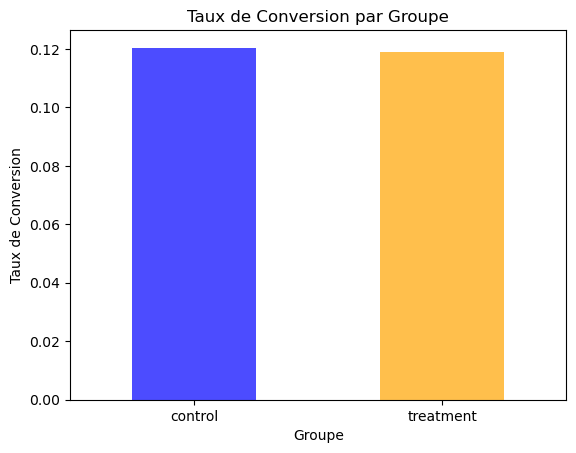

In [9]:
import matplotlib.pyplot as plt

# Bar plot des taux de conversion
conversion_rates.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Taux de Conversion par Groupe")
plt.ylabel("Taux de Conversion")
plt.xlabel("Groupe")
plt.xticks(rotation=0)
plt.show()


In [10]:
from scipy.stats import chi2_contingency

# Créer une table de contingence
contingency_table = pd.crosstab(data['group'], data['converted'])

# Test du Chi²
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi²: {chi2}, p-value: {p}")

if p < 0.05:
    print("La différence est statistiquement significative.")
else:
    print("La différence n'est pas statistiquement significative.")


Chi²: 1.5159618356336582, p-value: 0.2182316121631168
La différence n'est pas statistiquement significative.


In [11]:
contingency_table

converted,0,1
group,,
control,129479,17723
treatment,129762,17514


### Implications pour l'A/B Testing :

- Hypothèse nulle : Il n'y a pas de différence entre les deux pages.
- Résultat : Les données ne permettent pas de rejeter l'hypothèse nulle.
- Conclusion pratique : la nouvelle page n'apporte pas d'amélioration significative par rapport à l'ancienne page. Il n'est donc pas nécessaire de déployer la nouvelle page (sauf si d'autres facteurs entrent en jeu, comme le design ou le coût de maintenance).
